# 1.데이터 불러오기

In [65]:
# ===== 0) Import =====
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")  # 한글 폰트 (윈도우: 맑은 고딕)



# ===== 1) 데이터 로드 =====
set1 = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\big_data_contest\big_data_set1_f.csv", encoding='cp949')
set2 = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\big_data_contest\big_data_set2_f.csv", encoding='cp949')
set3 = pd.read_csv(r"C:\Users\yms10\OneDrive\바탕 화면\big_data_contest\big_data_set3_f.csv", encoding='cp949')


In [66]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ENCODED_MCT             86590 non-null  object 
 1   TA_YM                   86590 non-null  int64  
 2   MCT_OPE_MS_CN           86590 non-null  object 
 3   RC_M1_SAA               86590 non-null  object 
 4   RC_M1_TO_UE_CT          86590 non-null  object 
 5   RC_M1_UE_CUS_CN         86590 non-null  object 
 6   RC_M1_AV_NP_AT          86590 non-null  object 
 7   APV_CE_RAT              79958 non-null  object 
 8   DLV_SAA_RAT             86590 non-null  float64
 9   M1_SME_RY_SAA_RAT       86590 non-null  float64
 10  M1_SME_RY_CNT_RAT       86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT   86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT  86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT   86590 non-null  float64
 14  M12_SME_BZN_ME_MCT_RAT  86590 non-null

In [67]:
# =====  MERGE =====
# set2 × set3 : (가맹점구분번호, 기준년월) 기준
merged = pd.merge(
    set2,
    set3,
    on=["ENCODED_MCT", "TA_YM"],
    how="inner"  # 필요시 left/right/outer로 변경
)

# set1의 상권/업종 붙이기
df = pd.merge(merged, set1, on="ENCODED_MCT", how="left")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86590 entries, 0 to 86589
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENCODED_MCT               86590 non-null  object 
 1   TA_YM                     86590 non-null  int64  
 2   MCT_OPE_MS_CN             86590 non-null  object 
 3   RC_M1_SAA                 86590 non-null  object 
 4   RC_M1_TO_UE_CT            86590 non-null  object 
 5   RC_M1_UE_CUS_CN           86590 non-null  object 
 6   RC_M1_AV_NP_AT            86590 non-null  object 
 7   APV_CE_RAT                79958 non-null  object 
 8   DLV_SAA_RAT               86590 non-null  float64
 9   M1_SME_RY_SAA_RAT         86590 non-null  float64
 10  M1_SME_RY_CNT_RAT         86590 non-null  float64
 11  M12_SME_RY_SAA_PCE_RT     86590 non-null  float64
 12  M12_SME_BZN_SAA_PCE_RT    86590 non-null  float64
 13  M12_SME_RY_ME_MCT_RAT     86590 non-null  float64
 14  M12_SM

# 2. 컬럼명 한글로 변경

In [69]:
# ==============================

# ==============================
rename_cols = {
    # 공통 키/날짜
    "ENCODED_MCT": "가맹점구분번호",
    "TA_YM": "기준년월",
    # 순서형(구간) 원본
    "MCT_OPE_MS_CN": "가맹점_운영개월수_구간",
    "RC_M1_SAA": "매출금액_구간",
    "RC_M1_TO_UE_CT": "매출건수_구간",
    "RC_M1_UE_CUS_CN": "유니크고객수_구간",
    "RC_M1_AV_NP_AT": "객단가_구간",
    "APV_CE_RAT": "취소율_구간",
    # 연속형/비율
    "DLV_SAA_RAT": "배달매출금액_비율",
    "M1_SME_RY_SAA_RAT": "동일업종_매출금액_비율",
    "M1_SME_RY_CNT_RAT": "동일업종_매출건수_비율",
    "M12_SME_RY_SAA_PCE_RT": "동일업종_내_매출순위_비율",
    "M12_SME_BZN_SAA_PCE_RT": "동일상권_내_매출순위_비율",
    "M12_SME_RY_ME_MCT_RAT": "동일업종_내_해지_가맹점_비중",
    "M12_SME_BZN_ME_MCT_RAT": "동일상권_내_해지_가맹점_비중",
    # 성/연령/유형비중
    "M12_MAL_1020_RAT": "남성_20대이하_고객비중",
    "M12_MAL_30_RAT": "남성_30대_고객비중",
    "M12_MAL_40_RAT": "남성_40대_고객비중",
    "M12_MAL_50_RAT": "남성_50대_고객비중",
    "M12_MAL_60_RAT": "남성_60대이상_고객비중",
    "M12_FME_1020_RAT": "여성_20대이하_고객비중",
    "M12_FME_30_RAT": "여성_30대_고객비중",
    "M12_FME_40_RAT": "여성_40대_고객비중",
    "M12_FME_50_RAT": "여성_50대_고객비중",
    "M12_FME_60_RAT": "여성_60대이상_고객비중",
    "MCT_UE_CLN_REU_RAT": "재방문_고객비중",
    "MCT_UE_CLN_NEW_RAT": "신규_고객비중",
    "RC_M1_SHC_RSD_UE_CLN_RAT": "거주_이용_고객비율",
    "RC_M1_SHC_WP_UE_CLN_RAT": "직장_이용_고객비율",
    "RC_M1_SHC_FLP_UE_CLN_RAT": "유동인구_이용_고객비율",
    # 부가정보(있는 경우만)
    "MCT_BSE_AR": "가맹점주소",
    "MCT_NM": "가맹점명",
    "MCT_BRD_NUM": "브랜드구분코드",
    "MCT_SIGUNGU_NM": "가맹점지역",
    "HPSN_MCT_ZCD_NM": "업종",
    "HPSN_MCT_BZN_CD_NM": "상권",
    "ARE_D": "개설일",
    "MCT_ME_D": "폐업일",
}
df = df.rename(columns=rename_cols)

# 3. 전처리

In [70]:

import re
import numpy as np
import pandas as pd

#  기준년월 → datetime (int64에서 변환)
if pd.api.types.is_integer_dtype(df["기준년월"]) or pd.api.types.is_object_dtype(df["기준년월"]):
    df["기준년월"] = pd.to_datetime(df["기준년월"].astype(str), format="%Y%m", errors="coerce")

#  개설일/폐업일(있으면) 날짜 파싱
def parse_yyyymmdd(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()
    s = s.replace({"": np.nan, "nan": np.nan, "NaN": np.nan})
    s = s.str.replace(r"[^\d]", "", regex=True).str.slice(0, 8)
    return pd.to_datetime(s, format="%Y%m%d", errors="coerce")

for dcol in ["개설일", "폐업일"]:
    if dcol in df.columns:
        df[dcol] = parse_yyyymmdd(df[dcol])

#  특수 결측치 처리 (-999999.9 → NaN)  ※ 존재 시만
for c in ["배달매출금액_비율", "동일상권_내_해지_가맹점_비중"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").replace(-999999.9, np.nan)

#  동일업종 비율 숫자화 + 동시 0 → NaN
for c in ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
mask_both_zero = (df["동일업종_매출금액_비율"] == 0) & (df["동일업종_매출건수_비율"] == 0)
df.loc[mask_both_zero, ["동일업종_매출금액_비율", "동일업종_매출건수_비율"]] = np.nan

#  *_구간 → *_구간_ord (1~6 등급 숫자 추출)
def extract_level(x):
    if pd.isna(x): return np.nan
    m = re.match(r"\s*([1-6])", str(x))
    return float(m.group(1)) if m else np.nan

ord_src = ["가맹점_운영개월수_구간","매출금액_구간","매출건수_구간","유니크고객수_구간","객단가_구간","취소율_구간"]
for col in ord_src:
    if col in df.columns:
        df[col + "_ord"] = df[col].apply(extract_level)

In [71]:
print(df.head())

      가맹점구분번호       기준년월 가맹점_운영개월수_구간             매출금액_구간             매출건수_구간  \
0  000F03E44A 2024-04-01     4_50-75%            5_75-90%            5_75-90%   
1  000F03E44A 2023-12-01     4_50-75%  6_90%초과(하위 10% 이하)  6_90%초과(하위 10% 이하)   
2  002816BA73 2024-04-01     2_10-25%            3_25-50%            4_50-75%   
3  002816BA73 2024-11-01     2_10-25%            3_25-50%            4_50-75%   
4  002816BA73 2024-06-01     2_10-25%            4_50-75%            4_50-75%   

            유니크고객수_구간              객단가_구간          취소율_구간  배달매출금액_비율  \
0            5_75-90%            5_75-90%         1_상위1구간        NaN   
1  6_90%초과(하위 10% 이하)  6_90%초과(하위 10% 이하)             NaN        NaN   
2            4_50-75%            2_10-25%  6_상위6구간(하위1구간)        NaN   
3            4_50-75%            2_10-25%  6_상위6구간(하위1구간)        NaN   
4            4_50-75%            2_10-25%         1_상위1구간        NaN   

   동일업종_매출금액_비율  동일업종_매출건수_비율  동일업종_내_매출순위_비율  동일상권_내_매출순위_비율  \
0           2.6

# 4. EDA

## 1. 분포 안정성 검증

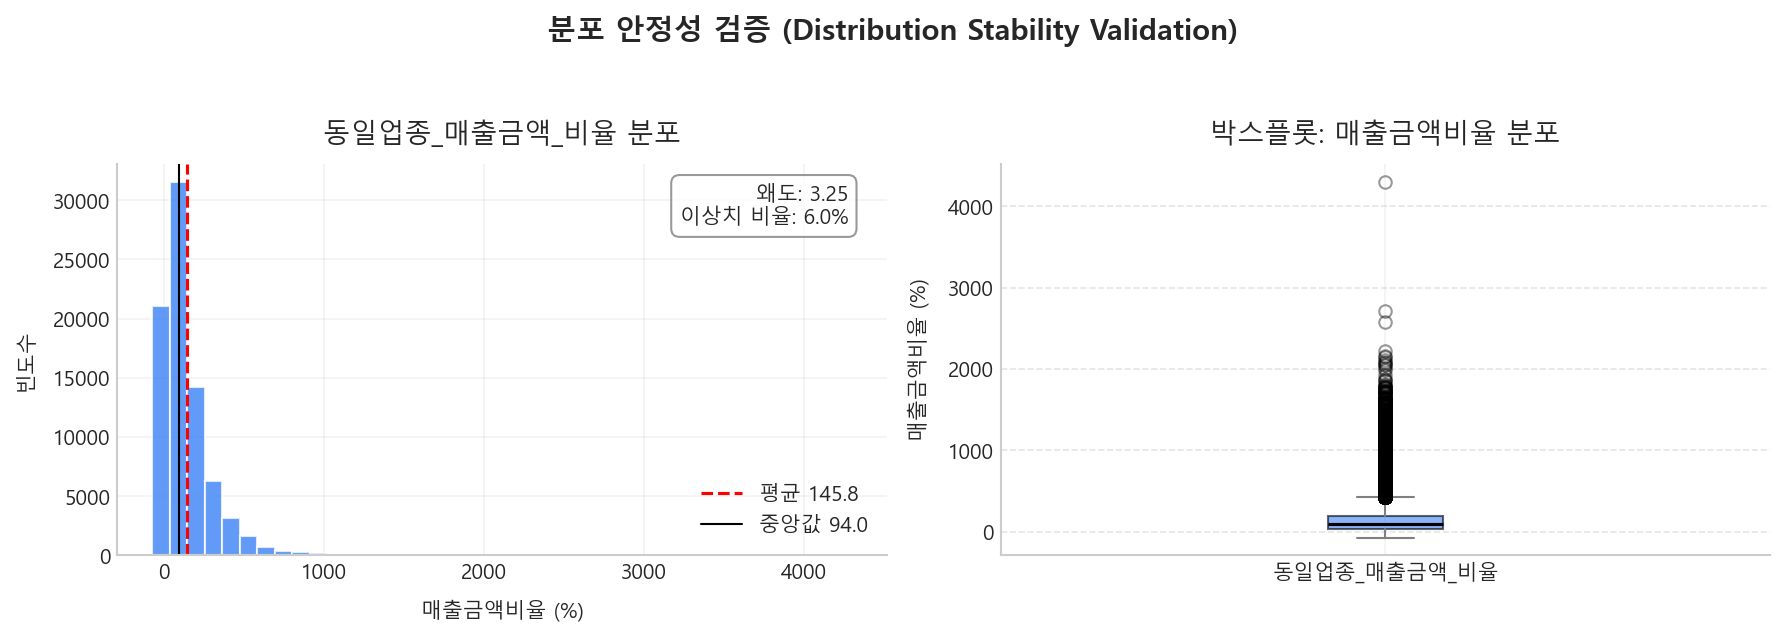

In [ ]:


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# --- 환경설정  ---
try:
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')

def plot_distribution_stability(df, col='동일업종_매출금액_비율'):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    if len(data) < 10:
        print("데이터가 충분하지 않습니다.")
        return

    # === 기본 통계 ===
    mean_val = data.mean()
    median_val = data.median()
    skew_val = stats.skew(data, nan_policy='omit')
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    out_rate = ((data < lo) | (data > hi)).mean()

    # === 시각화 ===
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    color = "#3B82F6"

    # 히스토그램
    axes[0].hist(data, bins=40, color=color, alpha=0.8, edgecolor='white')
    axes[0].axvline(mean_val, color='red', linestyle='--', lw=1.5, label=f"평균 {mean_val:.1f}")
    axes[0].axvline(median_val, color='black', linestyle='-', lw=1, label=f"중앙값 {median_val:.1f}")
    axes[0].legend()
    axes[0].set_title("동일업종_매출금액_비율 분포", fontsize=13)
    axes[0].set_xlabel("매출금액비율 (%)")
    axes[0].set_ylabel("빈도수")
    axes[0].text(0.95, 0.95,
                 f"왜도: {skew_val:.2f}\n이상치 비율: {out_rate*100:.1f}%",
                 transform=axes[0].transAxes,
                 ha='right', va='top',
                 bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8))

    # 박스플롯
    b = axes[1].boxplot(data, vert=True, patch_artist=True,
                        boxprops=dict(facecolor=color, alpha=0.6),
                        medianprops=dict(color='black', lw=1.5),
                        whiskerprops=dict(color='gray'),
                        capprops=dict(color='gray'),
                        flierprops=dict(marker='o', color='gray', alpha=0.4))
    axes[1].set_title("박스플롯: 매출금액비율 분포", fontsize=13)
    axes[1].set_xticks([1])
    axes[1].set_xticklabels(["동일업종_매출금액_비율"])
    axes[1].set_ylabel("매출금액비율 (%)")
    axes[1].grid(axis='y', linestyle='--', alpha=0.5)

    fig.suptitle("분포 안정성 검증 (Distribution Stability Validation)", fontsize=14, fontweight='bold', y=1.05)
    plt.tight_layout()

    # --- 강제 표시 (환경 무관) ---
    plt.show(block=True)

# ====================================글자 깨짐 방지 설정===========================
# 0) 기본: matplotlib 한글/마이너스 설정
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os, sys

plt.rcParams["axes.unicode_minus"] = False

# 1) 내 컴퓨터에 설치된 한글폰트들 중에서 자동 선택
KOREAN_FONT_CANDIDATES = [
    "Malgun Gothic",          # Windows
    "AppleGothic",            # macOS
    "NanumGothic", "NanumBarunGothic",
    "Noto Sans CJK KR", "Noto Sans KR",
    "Source Han Sans KR",     # 본고딕
    "Arial Unicode MS", "UnDotum", "Batang"
]

available = set(f.name for f in fm.fontManager.ttflist)
chosen = None
for name in KOREAN_FONT_CANDIDATES:
    if name in available:
        chosen = name
        break

if chosen:
    plt.rcParams["font.family"] = chosen
else:
    print("⚠️ 시스템 한글 폰트를 못 찾았어요. 아래 2) 방식으로 TTF를 직접 등록하세요.")

LOCAL_TTF = None  
if LOCAL_TTF and os.path.exists(LOCAL_TTF):
    fm.fontManager.addfont(LOCAL_TTF)
    font_prop = fm.FontProperties(fname=LOCAL_TTF)
    plt.rcParams["font.family"] = font_prop.get_name()
    print("✅ 로컬 TTF 등록:", plt.rcParams["font.family"])



plot_distribution_stability(df)




## 2. 내부 일관성 검증

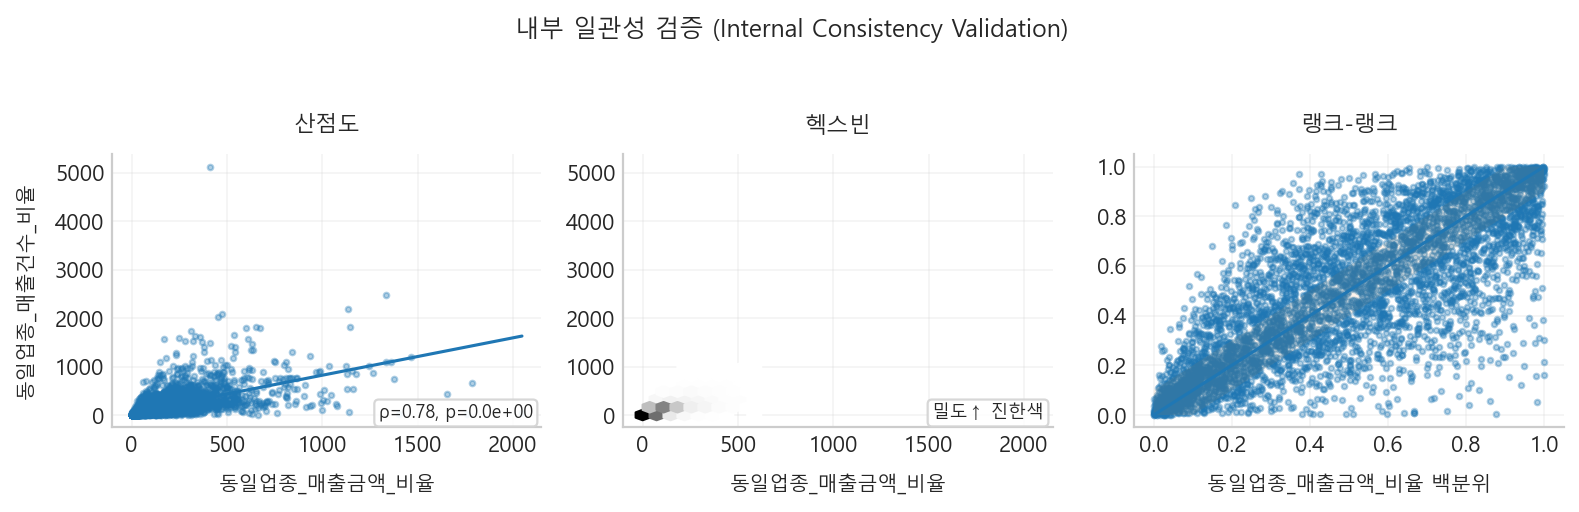

In [ ]:
# ======================================
# Compact 3-in-1 Internal Consistency Validation Plots
# ======================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 폰트 
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

def compact_internal_plots(
    df,
    xcol="동일업종_매출금액_비율",
    ycol="동일업종_매출건수_비율",
    max_n=5000,         
    gridsize=28         # 헥스빈 그리드
):
    d = df[[xcol, ycol]].copy()
    d[xcol] = pd.to_numeric(d[xcol], errors="coerce")
    d[ycol] = pd.to_numeric(d[ycol], errors="coerce")
    d = d.dropna()
    if len(d) < 30:
        print("데이터가 부족합니다(>=30 권장)."); return
    if len(d) > max_n:
        d = d.sample(max_n, random_state=42)

    # spearman
    rho, p = stats.spearmanr(d[xcol], d[ycol])

    # 랭크-랭크 백분위
    rx = d[xcol].rank(method='average', pct=True)
    ry = d[ycol].rank(method='average', pct=True)

    # Figure (작게)
    fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=160)
    for ax in axes:
        ax.grid(True, alpha=0.2)
        for spine in ["top","right"]:
            ax.spines[spine].set_visible(False)

    # 1) 산점도 (가벼운 회귀선)
    ax = axes[0]
    ax.scatter(d[xcol], d[ycol], s=6, alpha=0.35)
    try:
        z = np.polyfit(d[xcol], d[ycol], 1)
        xp = np.linspace(d[xcol].min(), d[xcol].max(), 100)
        ax.plot(xp, z[0]*xp + z[1], linewidth=1.4)
    except Exception:
        pass
    ax.set_title("산점도", fontsize=10)
    ax.set_xlabel(xcol, fontsize=9)
    ax.set_ylabel(ycol, fontsize=9)
    ax.text(0.98, 0.02, f"ρ={rho:.2f}, p={p:.1e}",
            transform=ax.transAxes, ha="right", va="bottom", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="lightgray", alpha=0.9))

    # 2) 헥스빈
    ax = axes[1]
    hb = ax.hexbin(d[xcol], d[ycol], gridsize=gridsize, mincnt=3)
    ax.set_title("헥스빈", fontsize=10)
    ax.set_xlabel(xcol, fontsize=9)
    ax.set_ylabel("")
    # 컬러바 대신 간단 주석만
    ax.text(0.98, 0.02, "밀도↑ 진한색", transform=ax.transAxes,
            ha="right", va="bottom", fontsize=8,
            bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="lightgray", alpha=0.9))

    # 3) 랭크-랭크
    ax = axes[2]
    ax.scatter(rx, ry, s=6, alpha=0.35)
    xs = np.linspace(0, 1, 200)
    ax.plot(xs, xs, linewidth=1.4)
    ax.fill_between(xs, np.clip(xs-0.1,0,1), np.clip(xs+0.1,0,1), alpha=0.08)
    ax.set_title("랭크-랭크", fontsize=10)
    ax.set_xlabel(f"{xcol} 백분위", fontsize=9)
    ax.set_ylabel("")

    fig.suptitle("내부 일관성 검증 (Internal Consistency Validation)", y=1.05, fontsize=11)
    plt.tight_layout()
    plt.show()

# 실행
compact_internal_plots(df)


## 3. 교차 타당성 검증

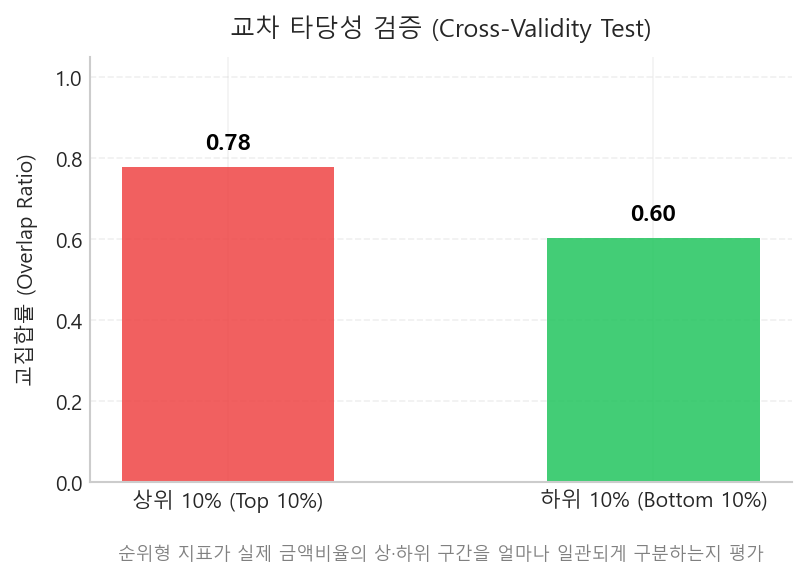

[교차 타당성 결과] 상위10% 교집합률: 0.778, 하위10% 교집합률: 0.604


In [ ]:
# ============================================
# 교차 타당성 검증 (Cross-Validity Test)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

def cross_validity_plot_pretty(
    df,
    col_value="동일업종_매출금액_비율",
    col_rank="동일업종_내_매출순위_비율",
    top_q=0.1,
    bottom_q=0.1
):
    d = df[[col_value, col_rank]].copy()
    d[col_value] = pd.to_numeric(d[col_value], errors="coerce")
    d[col_rank] = pd.to_numeric(d[col_rank], errors="coerce")
    d = d.dropna()

    # 순위비율 낮을수록 상위 → 역순 정렬
    d["순위역"] = 100 - d[col_rank]

    # 분위 구간 컷 설정
    top_val_cut = d[col_value].quantile(1 - top_q)
    bottom_val_cut = d[col_value].quantile(bottom_q)
    top_rank_cut = d["순위역"].quantile(1 - top_q)
    bottom_rank_cut = d["순위역"].quantile(bottom_q)

    # 상하위 인덱스 & 교집합률
    top_val_idx = set(d[d[col_value] >= top_val_cut].index)
    top_rank_idx = set(d[d["순위역"] >= top_rank_cut].index)
    bottom_val_idx = set(d[d[col_value] <= bottom_val_cut].index)
    bottom_rank_idx = set(d[d["순위역"] <= bottom_rank_cut].index)

    top_inter = len(top_val_idx & top_rank_idx) / len(top_val_idx)
    bottom_inter = len(bottom_val_idx & bottom_rank_idx) / len(bottom_val_idx)

    # ----------- 시각화 -----------
    colors = ["#EF4444", "#22C55E"]  # 빨강(상위), 초록(하위)

    fig, ax = plt.subplots(figsize=(5.5, 4))
    bars = ax.bar(
        ["상위 10% (Top 10%)", "하위 10% (Bottom 10%)"],
        [top_inter, bottom_inter],
        color=colors,
        alpha=0.85,
        width=0.5,
        edgecolor="none"
    )

    # 수치 표기
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.03,
                f"{h:.2f}", ha="center", va="bottom",
                fontsize=11, fontweight="bold", color="black")

    # 스타일 설정
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("교집합률 (Overlap Ratio)", fontsize=10)
    ax.set_title("교차 타당성 검증 (Cross-Validity Test)", fontsize=12, pad=10)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    # 하단 설명
    ax.text(0.5, -0.15,
        "순위형 지표가 실제 금액비율의 상·하위 구간을 얼마나 일관되게 구분하는지 평가",
        transform=ax.transAxes, ha="center", va="top",
        fontsize=8.5, color="gray")

    plt.tight_layout()
    plt.show()

    print(f"[교차 타당성 결과] 상위10% 교집합률: {top_inter:.3f}, 하위10% 교집합률: {bottom_inter:.3f}")

# 실행
cross_validity_plot_pretty(df)


## 4. 시계열 안정성 검증

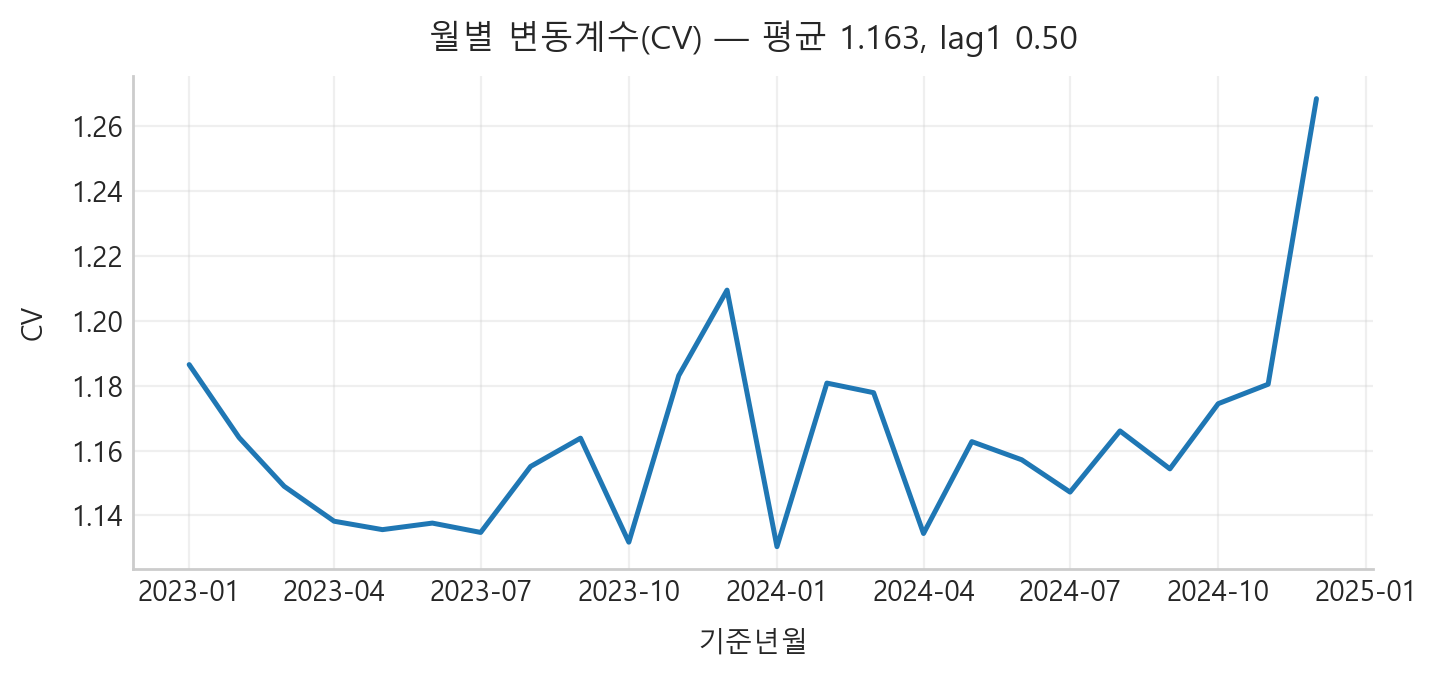

[saved] c:\Users\yms10\OneDrive\바탕 화면\eda_ts_plots\ts_cv.png
[시계열 안정성 요약]
- 월별 CV 평균: 1.163
- lag-1 자기상관: 0.50


In [79]:
# ================== 시계열 그래프 ==================
import os, io, sys
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use("Agg") 
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ── 1) 한글 폰트 자동 설정 ───────────────────────────────────────────────
plt.rcParams["axes.unicode_minus"] = False

CANDIDATES = [
    "Malgun Gothic",          # Windows
    "AppleGothic",            # macOS
    "NanumGothic", "NanumBarunGothic",
    "Noto Sans CJK KR", "Noto Sans KR",
    "Source Han Sans KR",     # 본고딕
]

def set_korean_font(local_ttf_path=None, verbose=True):
    installed = {f.name for f in fm.fontManager.ttflist}
    chosen = None
    for name in CANDIDATES:
        if name in installed:
            chosen = name
            break

    if chosen is None and local_ttf_path and os.path.exists(local_ttf_path):
        # 로컬 TTF/OTF 파일 등록
        fm.fontManager.addfont(local_ttf_path)
        prop = fm.FontProperties(fname=local_ttf_path)
        chosen = prop.get_name()

    if chosen:
        plt.rcParams["font.family"] = chosen
        if verbose: print(f"✅ Using Korean font: {chosen}")
    else:
        print("⚠️ 시스템 한글 폰트를 못 찾았습니다.")
        print("   방법1) OS에 'NanumGothic' 또는 'Noto Sans CJK KR' 설치")
        print("   방법2) local_ttf_path에 TTF/OTF 경로 지정하여 등록")


LOCAL_TTF = None  
set_korean_font(LOCAL_TTF)

try:
    from IPython.display import display, Image, clear_output
    _HAS_IPY = True
except Exception:
    _HAS_IPY = False

def show_or_save(fig, path):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=200, bbox_inches="tight")
    buf.seek(0)
    if _HAS_IPY:
        clear_output(wait=True)
        display(Image(data=buf.getvalue()))
    with open(path, "wb") as f:
        f.write(buf.getvalue())
    print(f"[saved] {os.path.abspath(path)}")

# ── 3) 시계열 안정성 시각화 ─────────────────────────────
SAVE_DIR = "eda_ts_plots"
os.makedirs(SAVE_DIR, exist_ok=True)

def _to_month(s):
    s = pd.to_datetime(s, errors="coerce")
    return s.dt.to_period("M").dt.to_timestamp()

def plot_timeseries_stability_FORCE(
    df,
    target_col="동일업종_매출금액_비율",
    date_col="기준년월",
    rolling=3
):
    d = df[[date_col, target_col]].copy()
    d[target_col] = pd.to_numeric(d[target_col], errors="coerce")
    d[date_col] = _to_month(d[date_col])
    d = d.dropna()
    if d.empty:
        print("시계열 데이터가 없습니다."); return

    m = d.groupby(date_col)[target_col].agg(['mean','std','count']).sort_index()
    m["cv"] = m["std"]/m["mean"]
    lag1 = m["mean"].autocorr(lag=1)
    cv_mean = float(m["cv"].mean(skipna=True))

    # 1) 월평균 + 이동평균
    fig, ax = plt.subplots(figsize=(8, 3.6))
    ax.plot(m.index, m["mean"], label="월평균 (Monthly mean)", lw=1.8)
    if len(m) >= rolling:
        ma = m["mean"].rolling(rolling).mean()
        ax.plot(ma.index, ma.values, label=f"{rolling}개월 이동평균 (Moving Avg)", lw=2)
    ax.set_title("시계열 안정성: 월평균 & 이동평균")
    ax.set_xlabel("기준년월"); ax.set_ylabel(target_col)
    ax.legend(); ax.grid(alpha=0.3)
    show_or_save(fig, os.path.join(SAVE_DIR, "ts_mean_ma.png"))
    plt.close(fig)

    # 2) 월별 CV
    fig, ax = plt.subplots(figsize=(8, 3.2))
    ax.plot(m.index, m["cv"], lw=1.8)
    ax.set_title(f"월별 변동계수(CV) — 평균 {cv_mean:.3f}, lag1 {lag1:.2f}")
    ax.set_xlabel("기준년월"); ax.set_ylabel("CV")
    ax.grid(alpha=0.3)
    show_or_save(fig, os.path.join(SAVE_DIR, "ts_cv.png"))
    plt.close(fig)

    print("[시계열 안정성 요약]")
    print(f"- 월별 CV 평균: {cv_mean:.3f}")
    print(f"- lag-1 자기상관: {lag1:.2f}")

# ── 5) 시계열 그래프 실행 ──────────────────────────────────────────
plot_timeseries_stability_FORCE(df, target_col="동일업종_매출금액_비율", date_col="기준년월", rolling=3)
